In [1]:
# from splinter import Browser
# from bs4 import BeautifulSoup as soup
# from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt 

# # Set up Splinter
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Temp site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
# browser.visit(url)

In [2]:
import pandas as pd
df = pd.read_html(url)
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [3]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [4]:
#Change the date to a date format and confirm conversion 

mars_df["terrestrial_date"]=pd.to_datetime(mars_df["terrestrial_date"])
mars_df.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [5]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
# 6 Question 
# Answer the following question: How many months exist on Mars?
mars_df["month"].unique()

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [7]:
# 6 Answer
# 12 Months exist on Mars 
mars_df.groupby('month').id.nunique()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64

In [8]:
#7 Question 
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [9]:
# 7 Answer
# 1867 Days Exist in the dataset


Text(0, 0.5, 'Min Temp')

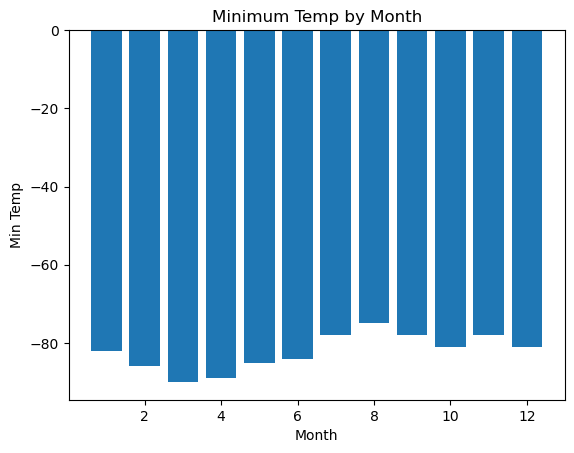

In [10]:
# 8 Question
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
# Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

min_temp=mars_df.groupby("month").min_temp.min()
min_temp=pd.DataFrame(min_temp)
min_temp

min_temp.reset_index(inplace=True)
min_temp = min_temp.rename(columns = {'index':'month'})


plt.bar(min_temp["month"], min_temp["min_temp"])

plt.title("Minimum Temp by Month")
plt.xlabel("Month")
plt.ylabel("Min Temp")

In [11]:
min_temp.columns


Index(['month', 'min_temp'], dtype='object')

In [12]:
# 8 Answer 
# Warmest month is month 8, Coldest Month is month 3 
min_temp

,month,min_temp
0,1,-82.0
1,2,-86.0
2,3,-90.0
3,4,-89.0
4,5,-85.0
5,6,-84.0
6,7,-78.0
7,8,-75.0
8,9,-78.0
9,10,-81.0


Text(0, 0.5, 'Atmospheric Pressure')

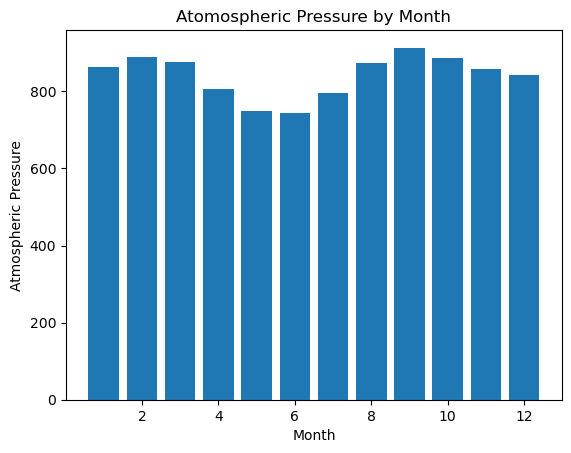

In [13]:
# 9 Question
# Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

atm_pres=mars_df.groupby("month").pressure.mean()
atm_pres=pd.DataFrame(atm_pres)
atm_pres

atm_pres.reset_index(inplace=True)
atm_pres = atm_pres.rename(columns = {'index':'month'})


plt.bar(atm_pres["month"], atm_pres["pressure"])
plt.title("Atomospheric Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")


In [14]:
# 9 Answer 
# Lowest Atmospheric Pressure is month 6. Highest is month 9 
atm_pres

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


Text(0, 0.5, 'min_temp')

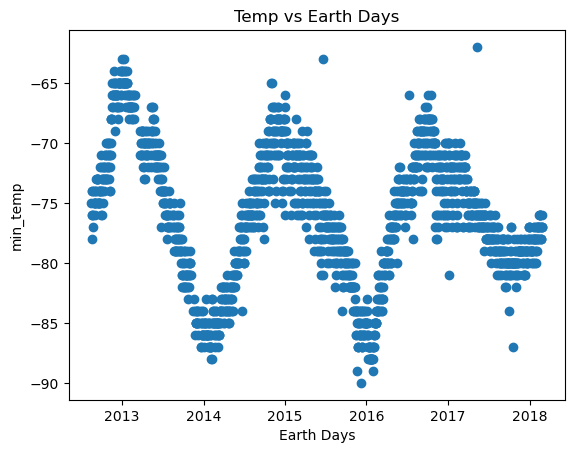

In [15]:
# # 10 Question
# # About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, 
# how many days elapse on Earth?
# # Visually estimate the result by plotting the daily minimum temperature.

plt.plot(mars_df["terrestrial_date"],mars_df["min_temp"], "o")
plt.title("Temp vs Earth Days")
plt.xlabel("Earth Days")
plt.ylabel("min_temp")

In [17]:
# 10 Answer
# About two years for earth for every 1 Martian year


In [18]:
#Save to CSV
mars_df.to_csv("mars_df.csv")
